In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [187]:
# 读取路径，获得图片名称
file_path = os.path.join(os.getcwd(),r'F:\1\img test\TestDataset\Kvasir\img Highlights processing\Highlights processing220-255')
file_names = os.listdir(file_path)

In [188]:
print (file_path)
print (file_names)

F:\1\img test\TestDataset\Kvasir\img Highlights processing\Highlights processing220-255
['cju0u82z3cuma0835wlxrnrjv.png', 'cju15wdt3zla10801odjiw7sy.png', 'cju16ach3m1da0993r1dq3sn2.png', 'cju16whaj0e7n0855q7b6cjkm.png', 'cju17z0qongpa0993de4boim4.png', 'cju1amqw6p8pw0993d9gc5crl.png', 'cju1bm8063nmh07996rsjjemq.png', 'cju1c3218411b08014g9f6gig.png', 'cju1cbokpuiw70988j4lq1fpi.png', 'cju1cj3f0qi5n0993ut8f49rj.png', 'cju1cqc7n4gpy0855jt246k68.png', 'cju1ddr6p4k5z08780uuuzit2.png', 'cju1f8w0t65en0799m9oacq0q.png', 'cju1h89h6xbnx08352k2790o9.png', 'cju1hp9i2xu8e0988u2dazk7m.png', 'cju2hfqnmhisa0993gpleeldd.png', 'cju2hjrqcvi2j0801bx1i6gxg.png', 'cju2hos57llxm08359g92p6jj.png', 'cju2hqt33lmra0988fr5ijv8j.png', 'cju2lberzkdzm09938cl40pog.png', 'cju2mh8t6p07008350e01tx2a.png', 'cju2nnqrqzp580855z8mhzgd6.png', 'cju2np2k9zi3v079992ypxqkn.png', 'cju2omjpeqj5a0988pjdlb8l1.png', 'cju2osuru0ki00855txo0n3uu.png', 'cju2pag1f0s4r0878h52uq83s.png', 'cju2rga4psq9n09881z519xx0.png', 'cju2rmd2rsw9g09888h

In [189]:
# 得到每张图片的路径
img_paths = []
for file_name in file_names:
    img_paths.append(os.path.join(file_path,file_name))
len(img_paths)

# for i in img_paths:
#     print(i)

100

In [190]:
# 读取彩图
# 读取每一张图片
img = np.zeros((len(file_names),288, 384, 3))
for i in range(len(file_names)):
    img0 = cv2.imread(img_paths[i],-1)
    img0 = cv2.resize(img0,(384,288))
    img0 = img0[...,::-1]
    img[i] = img0/255

(100, 288, 384, 3)


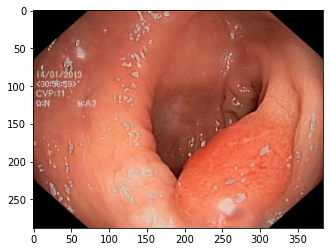

In [191]:
print(img.shape)
plt.imshow(img[1],'gray')

In [192]:
# RGB到HSI的变换
def rgb2hsi(image):
    b, g, r = cv2.split(image)                    # 读取通道
    r = r / 255.0                                # 归一化
    g = g / 255.0
    b = b / 255.0
    eps = 1e-6                                   # 防止除零

    img_i = (r + g + b) / 3                      # I分量

    img_h = np.zeros(r.shape, dtype=np.float32)
    img_s = np.zeros(r.shape, dtype=np.float32)
    min_rgb = np.zeros(r.shape, dtype=np.float32)
    # 获取RGB中最小值
    min_rgb = np.where((r <= g) & (r <= b), r, min_rgb)
    min_rgb = np.where((g <= r) & (g <= b), g, min_rgb)
    min_rgb = np.where((b <= g) & (b <= r), b, min_rgb)
    img_s = 1 - 3*min_rgb/(r+g+b+eps)                                            # S分量

    num = ((r-g) + (r-b))/2
    den = np.sqrt((r-g)**2 + (r-b)*(g-b))
    theta = np.arccos(num/(den+eps))
    img_h = np.where((b-g) > 0, 2*np.pi - theta, theta)                           # H分量
    img_h = np.where(img_s == 0, 0, img_h)

    img_h = img_h/(2*np.pi)                                                       # 归一化
    temp_s = img_s - np.min(img_s)
    temp_i = img_i - np.min(img_i)
    img_s = temp_s/np.max(temp_s)
    img_i = temp_i/np.max(temp_i)

    image_hsi = cv2.merge([img_h, img_s, img_i])
    return image_hsi

In [193]:
# 进行转换
imghsi = np.zeros((len(file_names),288, 384, 3))
for i in range(len(file_names)):
    imghsi[i] = rgb2hsi(img[i])

(100, 288, 384, 3)


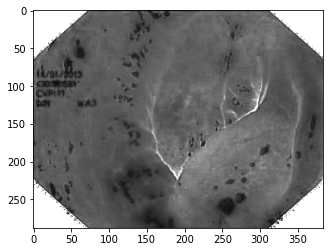

In [194]:
print(imghsi.shape)
plt.imshow(imghsi[1,:,:,1],'gray')

In [195]:
# masks
# 读取路径，获得图片名称
file_path = os.path.join(os.getcwd(),r'F:\1\img test\TestDataset\Kvasir\masks')
file_names = os.listdir(file_path)

In [196]:
print (file_path)
print (file_names)

F:\1\img test\TestDataset\Kvasir\masks
['cju0u82z3cuma0835wlxrnrjv.png', 'cju15wdt3zla10801odjiw7sy.png', 'cju16ach3m1da0993r1dq3sn2.png', 'cju16whaj0e7n0855q7b6cjkm.png', 'cju17z0qongpa0993de4boim4.png', 'cju1amqw6p8pw0993d9gc5crl.png', 'cju1bm8063nmh07996rsjjemq.png', 'cju1c3218411b08014g9f6gig.png', 'cju1cbokpuiw70988j4lq1fpi.png', 'cju1cj3f0qi5n0993ut8f49rj.png', 'cju1cqc7n4gpy0855jt246k68.png', 'cju1ddr6p4k5z08780uuuzit2.png', 'cju1f8w0t65en0799m9oacq0q.png', 'cju1h89h6xbnx08352k2790o9.png', 'cju1hp9i2xu8e0988u2dazk7m.png', 'cju2hfqnmhisa0993gpleeldd.png', 'cju2hjrqcvi2j0801bx1i6gxg.png', 'cju2hos57llxm08359g92p6jj.png', 'cju2hqt33lmra0988fr5ijv8j.png', 'cju2lberzkdzm09938cl40pog.png', 'cju2mh8t6p07008350e01tx2a.png', 'cju2nnqrqzp580855z8mhzgd6.png', 'cju2np2k9zi3v079992ypxqkn.png', 'cju2omjpeqj5a0988pjdlb8l1.png', 'cju2osuru0ki00855txo0n3uu.png', 'cju2pag1f0s4r0878h52uq83s.png', 'cju2rga4psq9n09881z519xx0.png', 'cju2rmd2rsw9g09888hh1efu0.png', 'cju2rqo702wpx0855fn7d5cxh.png', 'cj

In [197]:
# 得到每张图片的路径
masks_paths = []
for file_name in file_names:
    masks_paths.append(os.path.join(file_path,file_name))
len(masks_paths)

100

In [198]:
# 读取灰度图
# 读取每一张图片
masks = np.zeros((len(file_names),288, 384))
for i in range(len(file_names)):
    mask = cv2.imread(masks_paths[i],0)
    mask = cv2.resize(mask,(384,288))
    masks[i] = mask

(100, 288, 384, 3)


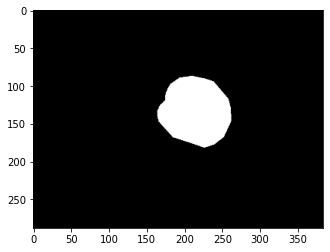

In [199]:
print(img.shape)
plt.imshow(masks[20],'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26a100821d0>)

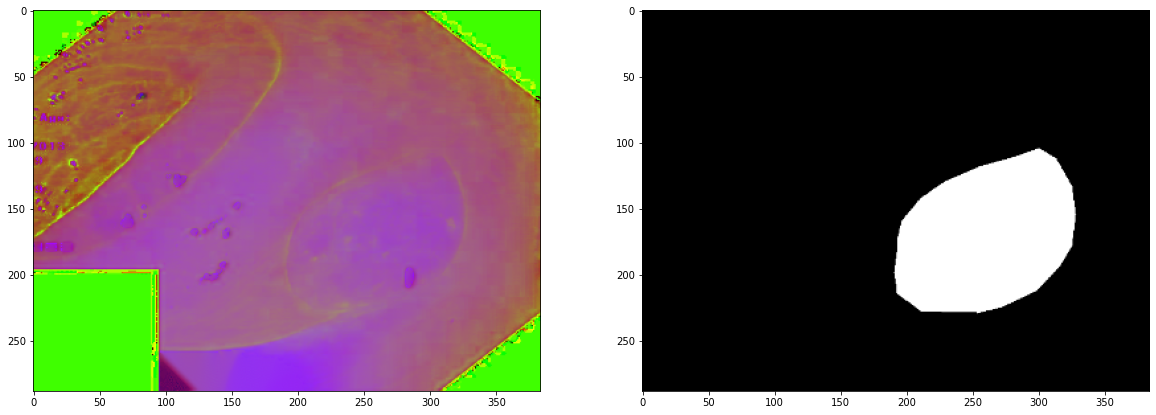

In [201]:
a = 56

plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(imghsi[a])
plt.subplot(122),plt.imshow(masks[a],'gray')
# plt.axis('off')

In [202]:
# 保存为h5文件
import time
from tqdm import trange
import h5py
for i in trange(5):
    f = h5py.File(r'F:\1\img test\TestDataset\Kvasir\img Highlights HSI\test_Kvasir 220Highlights imgHSIandmasks.h5', 'w')
    f.create_dataset('imgHSI', data=imghsi)
    f.create_dataset('masks', data=masks)
    f.close()
    time.sleep(0.5)
print("恭喜，运行完成，无bug")

100%|██████████| 5/5 [00:05<00:00,  1.20s/it]

恭喜，运行完成，无bug
